## Logistic Regression Model Comparisons - Lab

## Introduction

In this lab, we will further investigate some comparisons between our personal logistic regression implementation, that of sci-kit learn and further tuning parameters that can be adjusted in the model.

## Objectives

* Understand and implement logistic regression
* Compare logistic model outputs

In the previous lab, we were able to recreat a logistic regression model output from sci-kit learn that did not include an intercept of regularization. Here, you will continue to analyze the impact of several tuning parameters including the intercept, and regularization parameter which we have not discussed previously.

## Importing the Data

As with the previous lab, import the dataset stored in **heart.csv**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


## Problem Formulation

Define X and y as with the previous lab. This time, follow best practices and also implementk a standard train-test split.  
**For consistency of results, use random_state=17.**

In [3]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['target'])
y=df.target
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=17)

## Initial Model - Personal Implementation

Use your code from the previous lab to once again train a logistic regression algorithm on the training set.

In [7]:
#solutions code
def predict_y(X,w):
    y= np.dot(X,w)
    return y

def sigmoid(x):
    return (1)/(1 + np.power(np.e,-x))

def grad_desc(X, y, max_iterations, alpha, initial_weights=None):
    """Be sure to set default behavior for the initial_weights parameter."""
    if initial_weights == None:
        initial_weights = np.ones((X.shape[1],1)).flatten()
    weights_col= pd.DataFrame(initial_weights)
    weights = initial_weights
    #Create a for loop of iterations
    for iteration in range(max_iterations):
        #Generate predictions using the current feature weights
        predictions = sigmoid(np.dot(X,weights))
        #Calculate an error vector based on these initial predictions and the correct labels
        error_vector = y - predictions
        #Calculate the gradient 
        #As we saw in the previous lab, calculating the gradient is often the most difficult task.
        #Here, your are provided with the closed form solution for the gradient of the log-loss function derived from MLE
        #For more details on the derivation, see the additional resources section below.
        gradient = np.dot(X.transpose(),error_vector)
        #Update the weight vector take a step of alpha in direction of gradient 
        weights += alpha * gradient
        weights_col = pd.concat([weights_col, pd.DataFrame(weights)], axis=1)
    #Return finalized Weights
    return weights, weights_col

## Now use your algorithm to make [probability] predictions on the test set

In [12]:
weights, weight_col=grad_desc(X_train,y_train,10000, 0.001)
y_hat_test = sigmoid(np.dot(X_test, weights))

## Create an ROC curve for your predictions

AUC: 0.8982578397212544


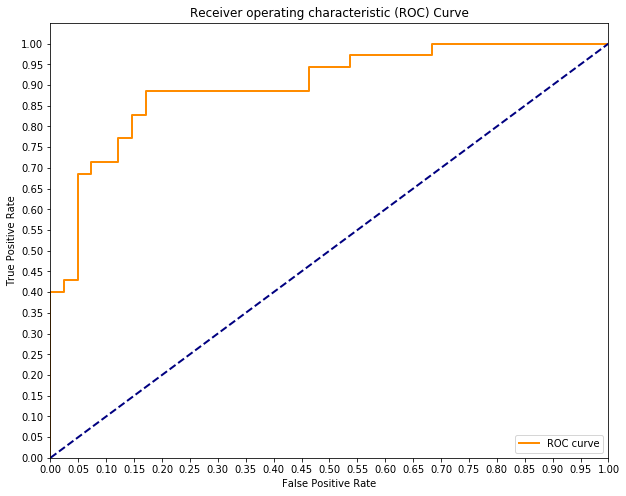

In [15]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,threshold=roc_curve(y_test,y_hat_test)

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Update your ROC curve to not only include a graph of the test set, but one of the train set

In [ ]:
# Your code here

## Create a confusion matrix for your predictions

Use a standard decision boundary of .5 to convert your probabilities output by logistic regression into binary classifications. (Again this should be for the test set.) Afterwards, feel free to use the built in sci-kit learn methods to compute the confusion matrix as we discussed in previous sections.

In [ ]:
# Your code here

## Initial Model - sci-kit learn

Do the same using the built in method from sci-kit learn. To start, create an identical model as you did in the last section; turn off the intercept and set the regularization parameter, C, to a ridiculously large number such as 1e16. 

In [17]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(fit_intercept=False,C=1e16)
model=logreg.fit(X_train,y_train)
y_hat_test=model.predict(X_test)

C:\Users\kosta\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Create an ROC Curve for the sci-kit learn model

AUC: 0.8996515679442508


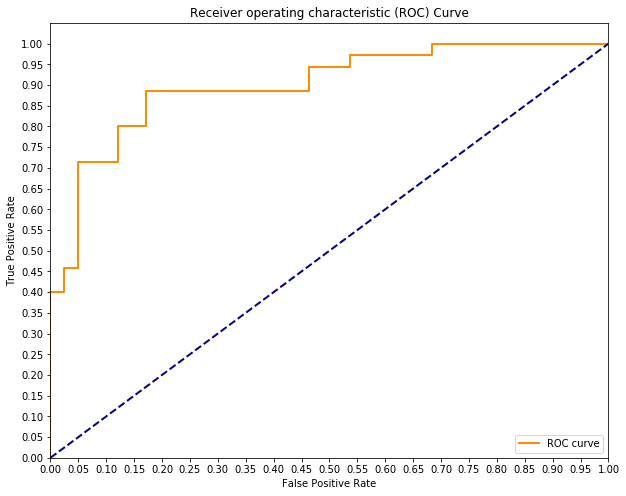

In [18]:
y_score = logreg.decision_function(X_test)
fpr,tpr,threshold=roc_curve(y_test,y_score)

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## As before add an ROC curve to the graph for the train set as well

AUC Test: 0.8996515679442508
AUC Train: 0.9291038858049168


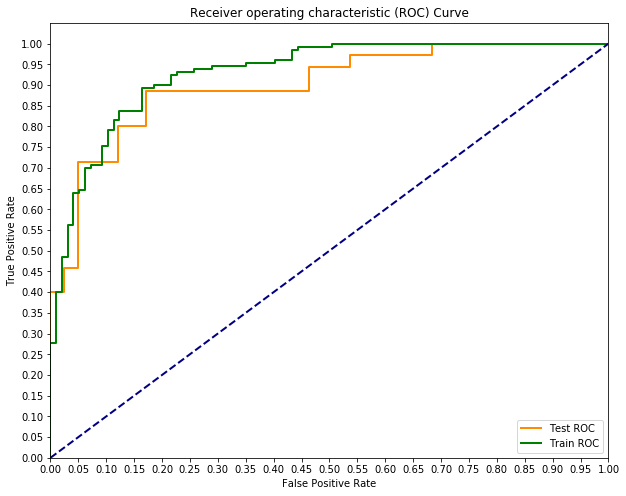

In [19]:
y_test_score = logreg.decision_function(X_test)
fpr_test,tpr_test,threshold=roc_curve(y_test,y_test_score)

y_train_score=logreg.decision_function(X_train)
fpr_train,tpr_train,threshold=roc_curve(y_train,y_train_score)

print('AUC Test: {}'.format(auc(fpr_test, tpr_test)))
print('AUC Train: {}'.format(auc(fpr_train,tpr_train)))

plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr_test, tpr_test, color='darkorange',
         lw=lw, label='Test ROC')
plt.plot(fpr_train,tpr_train,color='green',lw=lw,label='Train ROC')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Adding an Intercept

Now add an intercept to the sci-kit learn model. Keep the regularization parameter C set to a very large number such as 1e16. Plot all three models ROC curves on the same graph.

AUC Train: 0.9291038858049168
AUC Test: 0.8996515679442508
AUC intercept: 0.8989547038327527


C:\Users\kosta\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


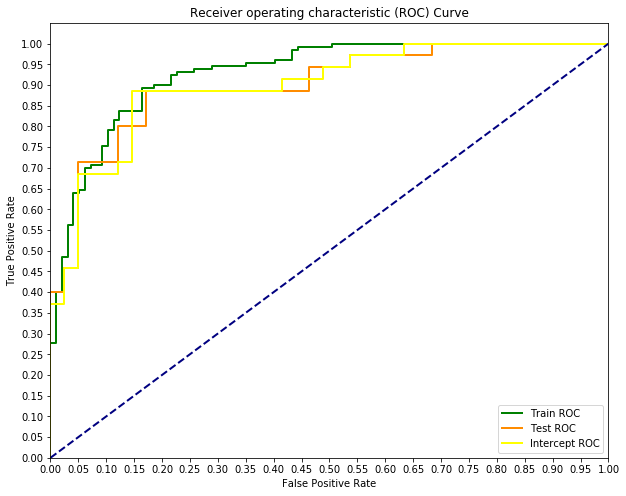

In [21]:
logregi=LogisticRegression(fit_intercept=True,C=1e16)
modeli=logregi.fit(X_train,y_train)
y_i_score=logregi.decision_function(X_test)
fpri,tpri,thresholdi=roc_curve(y_test,y_i_score)

y_test_score = logreg.decision_function(X_test)
fpr_test,tpr_test,threshold=roc_curve(y_test,y_test_score)

y_train_score=logreg.decision_function(X_train)
fpr_train,tpr_train,threshold=roc_curve(y_train,y_train_score)


print('AUC Train: {}'.format(auc(fpr_train,tpr_train)))
print('AUC Test: {}'.format(auc(fpr_test, tpr_test)))
print('AUC intercept: {}'.format(auc(fpri, tpri)))

plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr_train,tpr_train,color='green',lw=lw,label='Train ROC')
plt.plot(fpr_test, tpr_test, color='darkorange',
         lw=lw, label='Test ROC')
plt.plot(fpri,tpri,color='yellow',lw=lw,label='Intercept ROC')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Altering the Regularization Parameter

Now, experiment with altering the regularization parameter. At minimum, create 5 different subplots with varying regularization (C) parameters. For each, plot the ROC curve of the train and test set for that specific model.  

Regularization parameters between 1 and 20 are recommended. Observe the difference in test and train auc as you go along.

C:\Users\kosta\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kosta\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kosta\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kosta\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kosta\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Defau

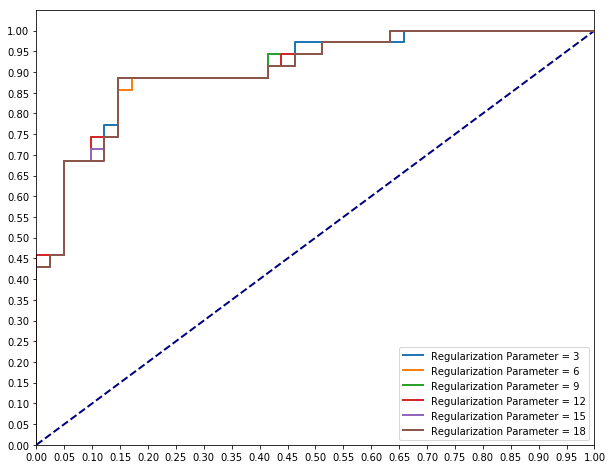

In [25]:
plt.figure(figsize=(10,8))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])

regpars=[3,6,9,12,15,18]
for reg in regpars:
    logregp=LogisticRegression(fit_intercept=True,C=reg)
    modelp=logregp.fit(X_train,y_train)
    y_p_score=logregp.decision_function(X_test)
    fprp,tprp,threshp=roc_curve(y_test,y_p_score)
    plt.plot(fprp,tprp,label='Regularization Parameter = {}'.format(reg),lw=lw)
    
plt.legend()
plt.show()

## Comment on how the Regularization Parameter Impacts the ROC curves plotted above

#Your response here

## Summary

In this lesson, we reviewed many of the accuracy measures of classification algorithms and observed the impact of additional tuning parameters such as regularization.